# Analyzing the scraped data
When scraping data from the internet, we often need to do some "sanity checks" to make sure that the collected data is what we expect it to be, because in scraping we are exposed to connection problems, bans from the host, and errors caused by the differences between the HTML structures of different web pages.

In this notebook, you are asked to plot some graphs to explore the data that you have collected and find the problems in it, if any.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Exploring the downloaded HTML files

### Task 1.1
In this task, you have to plot the distribution of the file sizes of the HTML pages that you have downloaded. Usually, all pages will have a similar size. If you notice that you have a number of files with a significantly different size than the majority of the files, then it may be a good idea to check these files and explore the reason behind this difference. For example, in our code we are saving empty HTML files if we face an error while downloading the web pages. Therefore, seeing a number of files with size zero in the histogram indicates that we have some HTML pages that were not downloaded.

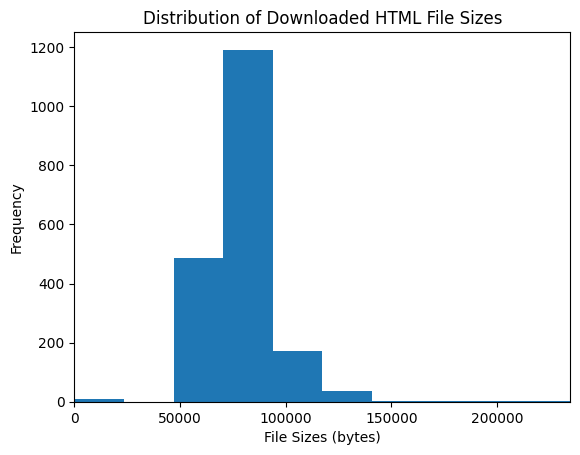

<Figure size 640x480 with 0 Axes>

In [35]:
# Plot the distribution of the downloaded HTML file sizes
# WRITE YOUR CODE HERE
import os
import matplotlib.pyplot as plt

# Directory containing the downloaded HTML files
directory = 'data/raw_html'

# Get file sizes
file_sizes = []
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if os.path.isfile(filepath):
        file_sizes.append(os.path.getsize(filepath))

# Plot the distribution
plt.hist(file_sizes, bins=10)
plt.xlabel('File Sizes (bytes)')
plt.ylabel('Frequency')
plt.title('Distribution of Downloaded HTML File Sizes')
plt.xlim(0, max(file_sizes))

plt.show()

if not os.path.exists("figures"):
    os.makedirs("figures")

# Save the final plot in figures/file_sizes.png using the code below
plt.savefig('figures/html_file_size.png')

### Task 1.2
Since the HTML file size is significantly affected by the images it contains, another way to explore the downloaded HTML files is by looking at the number of lines in each file. In this task, you need to plot a distribution of the number of lines in the downloaded HTML files.

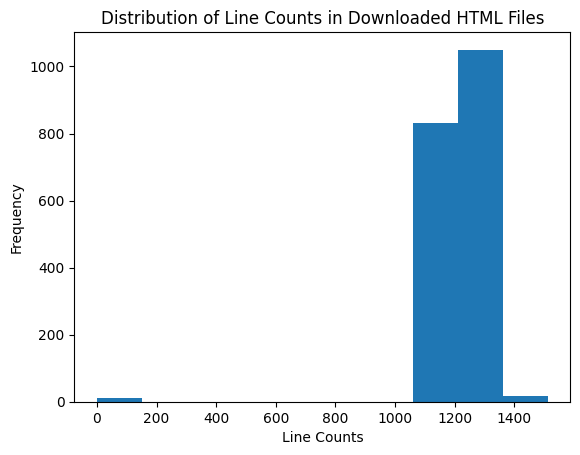

In [36]:
# Plot the distribution of line counts in the downloaded HTML files
# WRITE YOUR CODE HERE
line_counts = []
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if os.path.isfile(filepath):
        try:
            with open(filepath, 'r', encoding='utf-8') as file:
                line_count = sum(1 for _ in file)
                line_counts.append(line_count)
        except UnicodeDecodeError:
            with open(filepath, 'r', encoding='utf-8', errors='replace') as file:
                line_count = sum(1 for _ in file)
                line_counts.append(line_count)

# Plot the distribution
plt.hist(line_counts, bins=10)
plt.xlabel('Line Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Line Counts in Downloaded HTML Files')



# Save the final plot in figures/html_line_count.png using the code below
plt.savefig('figures/html_line_count.png')

## 2. Exploring the processed data

### Task 2.1
The first thing to check is if we have extracted information from all of the collected links or not. In this task, you need to compare the number of links that you have collected (in link_list.txt) to the number of parsed data dictionaries (in parsed_data.jsons) that you have created by parsing the downloaded HTML files.

In [37]:
import json
# Compute the number of links in link_list.txt
# WRITE YOUR CODE HERE
n_collected_links = 0

link_list_path = 'data/link_list.txt'
with open(link_list_path, 'r') as file:
    n_collected_links = sum(1 for _ in file)

# Compute the number of the parsed data dictionaries in parsed_data.jsons
# WRITE YOUR CODE HERE
n_parsed_links = 0
parsed_data_path = 'data/parsed_data.jsons'
with open(parsed_data_path, 'r') as file:
    parsed_data = [json.loads(line) for line in file]
    n_parsed_links = len(parsed_data)

print(f"Number of collected links: {n_collected_links}")
print(f"Number of parsed links: {n_parsed_links}")

Number of collected links: 1909
Number of parsed links: 1896


### Task 2.2
In this task, you need to plot the distribution of line counts in the text content that you extracted from the HTML web pages. This will help point out some errors in content extraction, if any.

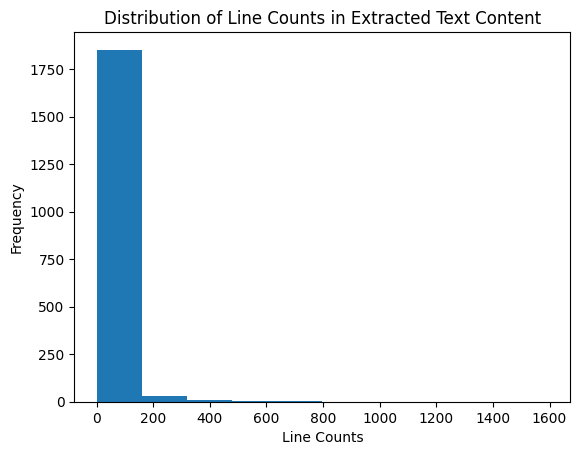

In [38]:
# Plot the distribution of line counts in the extracted text content
# WRITE YOUR CODE HERE
parsed_data_path = 'data/parsed_data.jsons'
with open(parsed_data_path, 'r') as file:
    parsed_data = [json.loads(line) for line in file]

# Extract line counts from the parsed data
line_counts = []
for entry in parsed_data:
    if 'content' in entry:
        line_count = len(entry['content'].split('\n'))
        line_counts.append(line_count)

# Plot the distribution
plt.hist(line_counts, bins=10)
plt.xlabel('Line Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Line Counts in Extracted Text Content')


# Save the final plot in figures/content_line_count.png using the code below
plt.savefig('figures/content_line_count.png')

### Task 2.3
In this task, you need to plot the distribution of the dates of the collected news articles.

/var/folders/sk/cm9yjm9d41gc87b2w5hjgmnh0000gn/T/ipykernel_24827/2088395320.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(dates, errors='coerce')


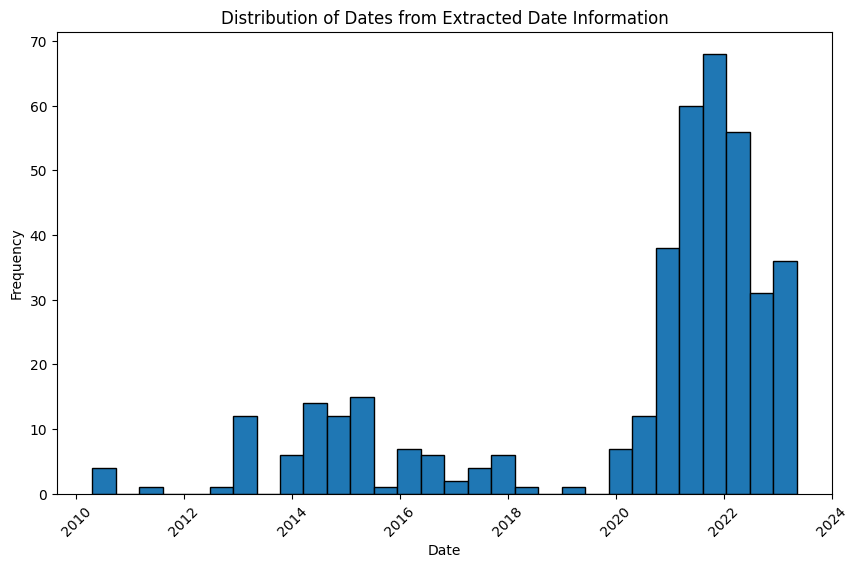

In [39]:
import json
import matplotlib.pyplot as plt
import pandas as pd

# Load parsed data from parsed_data.jsons
parsed_data_path = 'data/parsed_data.jsons'
with open(parsed_data_path, 'r') as file:
    parsed_data = [json.loads(line) for line in file]

# Extract dates from the parsed data
dates = []
for entry in parsed_data:
    if 'date' in entry:
        dates.append(entry['date'])

# Convert dates to pandas datetime format
dates = pd.to_datetime(dates, errors='coerce')

# Plot the distribution of dates
plt.figure(figsize=(10, 6))
plt.hist(dates, bins=30, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Dates from Extracted Date Information')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Save the plot as an image file
plt.savefig('figures/date_dist.png')

# Display the plot
plt.show()
